#3D plot visualisation


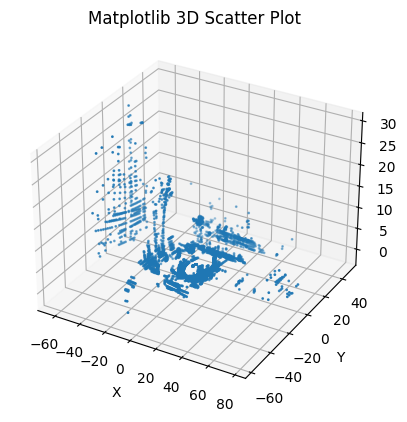

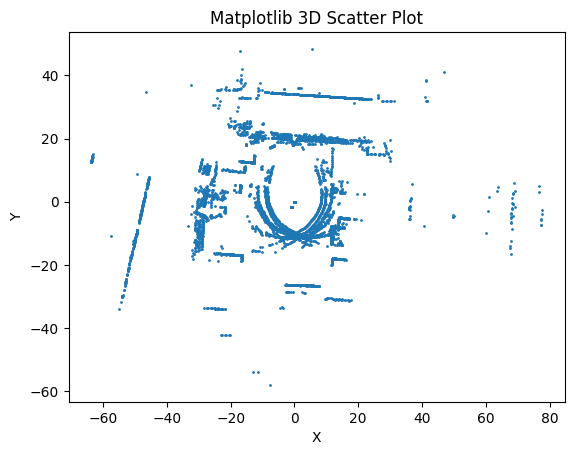

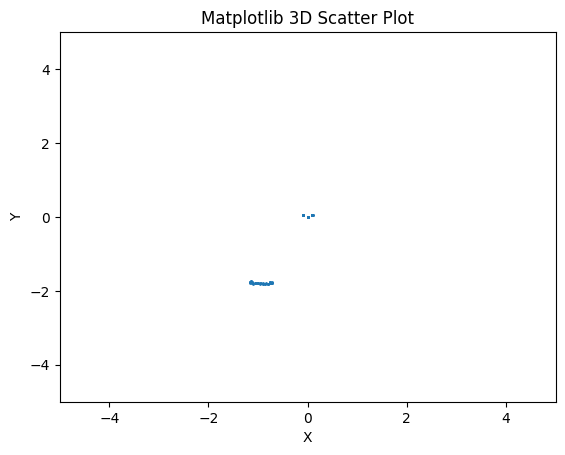

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
# Assuming lidar_positions is your numpy array of shape [n, 3] 
# Replace it with your actual data 
lidar_positions = np.load("1706255123.399811.npy")  # Example random lidar positions 
 
# Matplotlib 3D plot 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(lidar_positions[:, 0], lidar_positions[:, 1], lidar_positions[:, 2], s=1) 
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z') 
ax.set_title('Matplotlib 3D Scatter Plot') 
plt.show() 
 
# Matplotlib 2D plot 
fig = plt.figure() 
ax = fig.add_subplot() 
ax.scatter(lidar_positions[:, 0], lidar_positions[:, 1], s=1) 
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_title('Matplotlib 3D Scatter Plot') 
plt.show() 
 
# Matplotlib 2D plot 
fig = plt.figure() 
ax = fig.add_subplot() 
ax.scatter(lidar_positions[:, 0], lidar_positions[:, 1], s=1) 
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_xlim((-5, 5)) 
ax.set_ylim((-5, 5)) 
ax.set_title('Matplotlib 3D Scatter Plot') 
plt.show() 
 
# Plotly 3D plot 
trace = go.Scatter3d( 
    x=lidar_positions[:, 0], 
    y=lidar_positions[:, 1], 
    z=lidar_positions[:, 2], 
    mode='markers', 
    marker=dict( 
        size=1, 
        color='rgb(0, 0, 255)', 
        opacity=0.8 
    ) 
) 
 
layout = go.Layout( 
    title='Plotly 3D Scatter Plot', 
    scene=dict( 
        xaxis=dict(title='X'), 
        yaxis=dict(title='Y'), 
        zaxis=dict(title='Z') 
    ) 
) 
 
fig = go.Figure(data=[trace], layout=layout) 
fig.show()

# K-Means (Optimise with 2-5 centers)

/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Number of clusters: 2, Silhouette Score: 0.8225840137104238


/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Number of clusters: 3, Silhouette Score: 0.8288733266712406


/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Number of clusters: 4, Silhouette Score: 0.8214645405935744
Best number of clusters: 3


/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



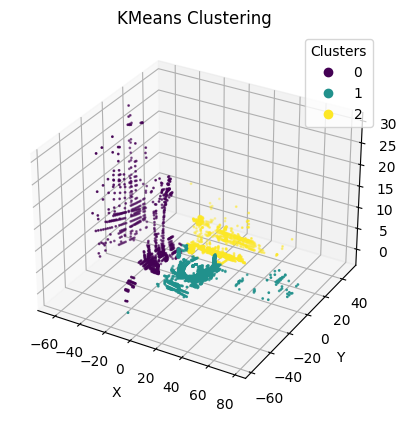

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load your lidar data
# Replace this with the actual data you want to cluster
lidar_positions = np.load("1706255123.399811.npy")

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_cluster in range(2, 5):
    kmeans = KMeans(n_clusters=n_cluster).fit(lidar_positions)
    score = silhouette_score(lidar_positions, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Number of clusters: {n_cluster}, Silhouette Score: {score}")

best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts at 2
print(f"Best number of clusters: {best_n_clusters}")

# Apply KMeans with the determined number of clusters
kmeans = KMeans(n_clusters=best_n_clusters)
kmeans.fit(lidar_positions)

# Assign each point to the nearest cluster centroid
clusters = kmeans.predict(lidar_positions)

# Now visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(lidar_positions[:, 0], lidar_positions[:, 1], lidar_positions[:, 2], c=clusters, s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('KMeans Clustering')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# KMeans Predict location with expected coordinates

/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_km

Best number of clusters: 6
Closest centroid to expected position: [  4.23468751 -27.63086708   0.93453125]


/home/chengwenn00/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



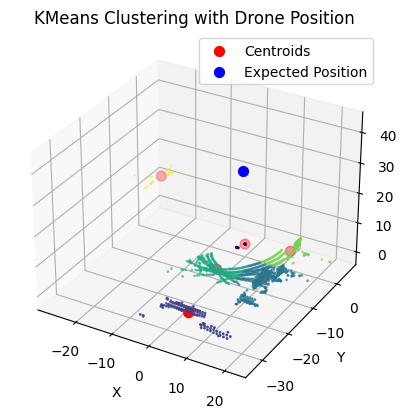

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your LIDAR data
lidar_positions = np.load("1706255123.399811.npy")

# Optional: Filter the data based on expected position and a generous range
expected_position = np.array([12.69621039, -19.60909913, 43.36182919])
distance_threshold = 50  # Adjust this threshold based on expected drone movement area
filtered_positions = lidar_positions[np.linalg.norm(lidar_positions - expected_position, axis=1) < distance_threshold]

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
range_clusters = range(2, 10)  # Increased range
for n_cluster in range_clusters:
    kmeans = KMeans(n_clusters=n_cluster).fit(filtered_positions)
    score = silhouette_score(filtered_positions, kmeans.labels_)
    silhouette_scores.append(score)

best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + min(range_clusters)
print(f"Best number of clusters: {best_n_clusters}")

# Apply KMeans with the determined number of clusters
kmeans = KMeans(n_clusters=best_n_clusters)
kmeans.fit(filtered_positions)
clusters = kmeans.predict(filtered_positions)

# Calculate centroids and find the closest to the expected position
centroids = kmeans.cluster_centers_
closest_centroid = centroids[np.argmin(np.linalg.norm(centroids - expected_position, axis=1))]
print(f"Closest centroid to expected position: {closest_centroid}")

# Visualize the clusters and centroids
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_positions[:, 0], filtered_positions[:, 1], filtered_positions[:, 2], c=clusters, s=1)
centroids_scatter = ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=50, label='Centroids')
ax.scatter(*expected_position, c='blue', s=50, label='Expected Position')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('KMeans Clustering with Drone Position')
plt.legend()
plt.show()